<a href="https://colab.research.google.com/github/nikaslukyanov/AI4ALL/blob/main/DataFrame_Grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# Create DataFrame (df)
df = pd.DataFrame({
     'Student': ['Ajay', 'Elise', 'Carmen', 'John', 'Kayla', "Jerome", "Jose", "Abbie"],
     'Quiz 1 Score': [80, 65, 80, 75, 85, 70, 90, 60],
     'Quiz 2 Score': [None, 90, 63, 90, 90, 84, 72, 81],
     'Major': ['Computer Science', 'Computer Science', 'Engineering', 'Business', 'Computer Science', 'Engineering', 'Psychology', "Molecular Biology"]
 })

df['Quiz 1 Score'] = df['Quiz 1 Score'].astype(float)

df = df.set_index("Student")

In [ ]:
df

,Quiz 1 Score,Quiz 2 Score,Major
Student,,,
Ajay,80.0,NaN,Computer Science
Elise,65.0,90.0,Computer Science
Carmen,80.0,63.0,Engineering
John,75.0,90.0,Business
Kayla,85.0,90.0,Computer Science
Jerome,70.0,84.0,Engineering
Jose,90.0,72.0,Psychology
Abbie,60.0,81.0,Molecular Biology


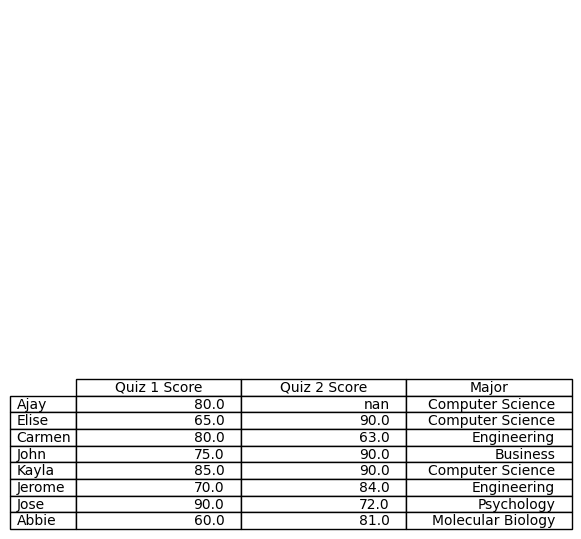

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

# Create a subplot without visible axes
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Plot the table onto the subplot
table(ax, df)

# Save the table as a PNG image
plt.savefig('Raw_DataFrame.png', dpi=300, bbox_inches="tight")

In [ ]:
# Count number of students grouped by major
grouped_by_count = df.groupby("Major").size()
grouped_by_count.columns = ['Number of Students']
grouped_by_count

Major
Business             1
Computer Science     3
Engineering          2
Molecular Biology    1
Psychology           1
dtype: int64

In [ ]:
# Number of unique majors
len(set(df["Major"]))

5

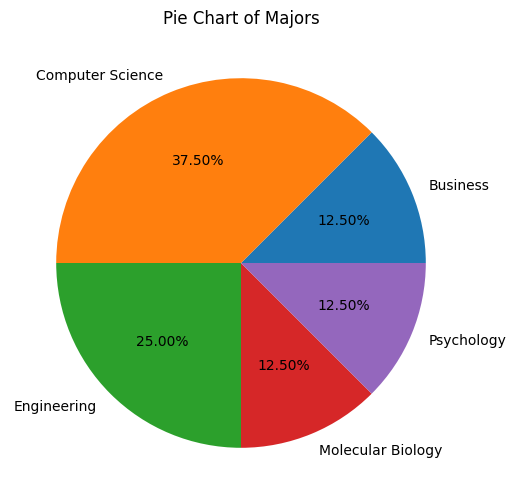

In [ ]:
import matplotlib.pyplot as plt
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_by_count, labels=grouped_by_count.index, autopct='%1.2f%%')
plt.title('Pie Chart of Majors')
plt.show()

In [ ]:
# Calculate average quiz scores grouped by major
average_by_major = df.groupby("Major").mean()
average_by_major

,Quiz 1 Score,Quiz 2 Score
Major,,
Business,75.000000,90.0
Computer Science,76.666667,90.0
Engineering,75.000000,73.5
Molecular Biology,60.000000,81.0
Psychology,90.000000,72.0


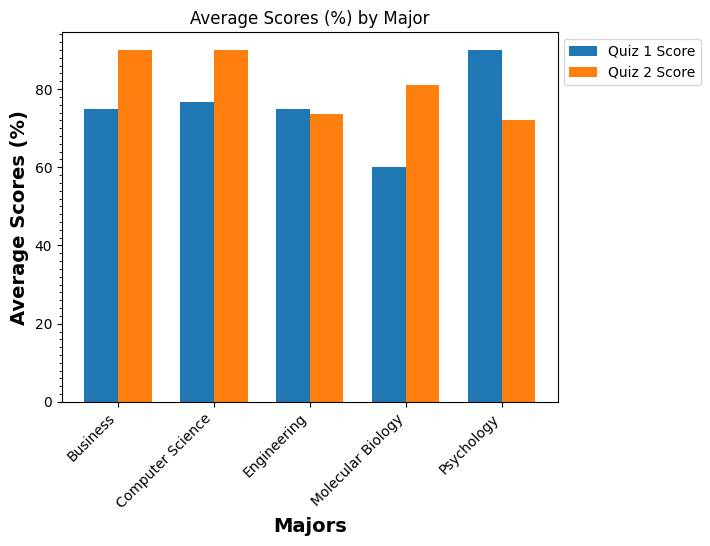

In [ ]:
# Build a visualization to show mulitple pandas columns (quiz scoes in this case)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Positioning parameters
bar_width = 0.35
position = np.arange(len(average_by_major))

# Creating the bar plots for both quizes on the same graph (ax)
fig, ax = plt.subplots()
bar1 = ax.bar(position, average_by_major['Quiz 1 Score'], width=bar_width, label='Quiz 1 Score')
bar2 = ax.bar(position + bar_width, average_by_major['Quiz 2 Score'], width=bar_width, label='Quiz 2 Score')

# Adding labels and title
ax.set_xlabel('Majors', fontweight="bold", fontsize=14)
ax.set_ylabel('Average Scores (%)', fontweight="bold", fontsize=14)
ax.set_title('Average Scores (%) by Major')

## Adjust the placement of the tick labels
ax.set_xticks(position + bar_width / 2)
ax.set_xticklabels(average_by_major.index, rotation=45, ha="right")

# Adding minor ticks on the y-axis
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(10))  # 9 minor ticks between majors

# Move legend ouside of figure
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1))

# Save the plot (and have the legend in frame)
plt.savefig("Major_Average_Scores_Barchart.png", dpi=300, bbox_inches='tight')


In [ ]:
## End of Script